In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [7]:
os.chdir(r"C:\Users\HP\Desktop\ml project")
df = pd.read_csv('Crop_Soil_Climate_Morocco1.csv')

In [9]:
df.head()

,nitrogen,phosphorus,potassium,ph,humidity_avg,temp_avg,precip_avg,target_crop,region_city
0,0.23,5.401,738.231,5.81,10.024167,25.178333,6.229167,barley,Fès-Meknès
1,0.23,10.478,606.382,5.43,10.024167,25.178333,6.229167,barley,Gharb
2,0.23,6.847,386.580,5.41,10.024167,25.178333,6.229167,barley,Tadla
3,0.23,3.418,207.086,5.65,10.024167,25.178333,6.229167,barley,Fès-Meknès
4,0.23,39.282,317.357,5.27,10.024167,25.178333,6.229167,barley,Tadla


In [11]:
df.columns

Index(['nitrogen', 'phosphorus', 'potassium', 'ph', 'humidity_avg', 'temp_avg',
       'precip_avg', 'target_crop', 'region_city'],
      dtype='object')

In [13]:
df.describe()

,nitrogen,phosphorus,potassium,ph,humidity_avg,temp_avg,precip_avg
count,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000,3203.000000
mean,14.559881,28.688742,248.665875,5.972061,29.351532,24.899661,29.576993
std,29.955073,47.639242,225.341651,0.676469,32.466819,3.438261,39.132517
min,0.000000,0.000000,5.000000,4.400000,8.595000,8.825675,3.288333
25%,0.174150,3.000000,80.000000,5.500000,10.024167,23.053333,5.606667
50%,0.230000,7.153000,202.000000,5.840256,10.472500,25.178333,7.538333
75%,13.000000,29.000000,343.000000,6.300000,24.969258,27.306667,48.331849
max,120.000000,782.000000,2119.000000,8.868741,94.998975,41.948657,149.744103


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nitrogen      3203 non-null   float64
 1   phosphorus    3203 non-null   float64
 2   potassium     3203 non-null   float64
 3   ph            3203 non-null   float64
 4   humidity_avg  3203 non-null   float64
 5   temp_avg      3203 non-null   float64
 6   precip_avg    3203 non-null   float64
 7   target_crop   3203 non-null   object 
 8   region_city   1769 non-null   object 
dtypes: float64(7), object(2)
memory usage: 225.3+ KB


In [17]:
df['target_crop'].value_counts()

target_crop
maize          732
wheat          715
barley         503
bean           253
chickpea       100
kidneybeans    100
lentil         100
pomegranate    100
banana         100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
Name: count, dtype: int64

In [19]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

region_city    1434
dtype: int64


In [21]:
df['region_city'] = df['region_city'].fillna('Unknown')

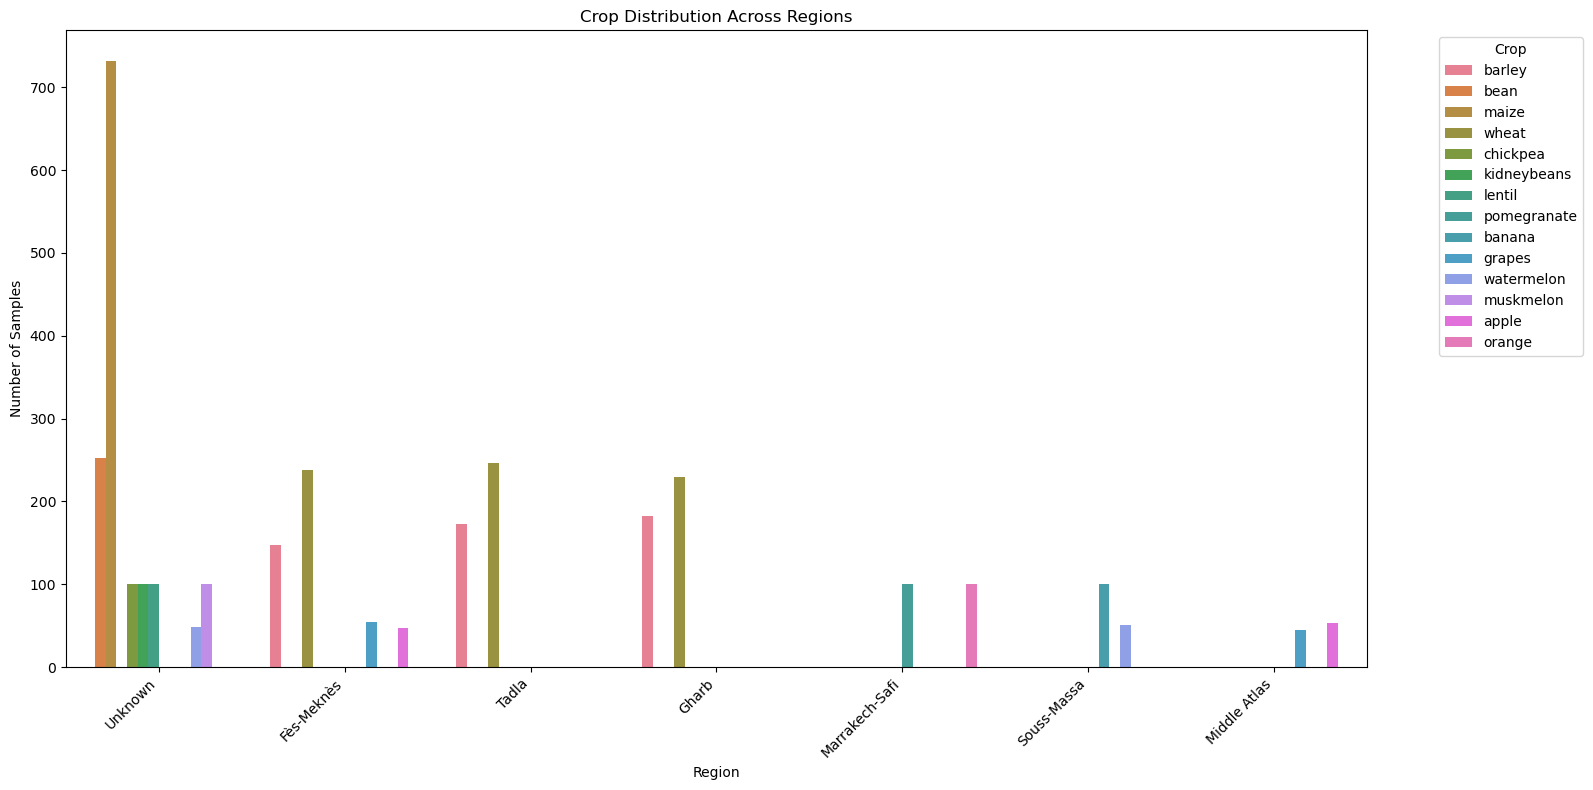

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# If your DataFrame is final_df and has columns 'region_city' and 'target_crop'

plt.figure(figsize=(16,8))
sns.countplot(data=df, x='region_city', hue='target_crop', 
              order=df['region_city'].value_counts().index)

plt.xticks(rotation=45, ha='right')
plt.title("Crop Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Number of Samples")
plt.legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


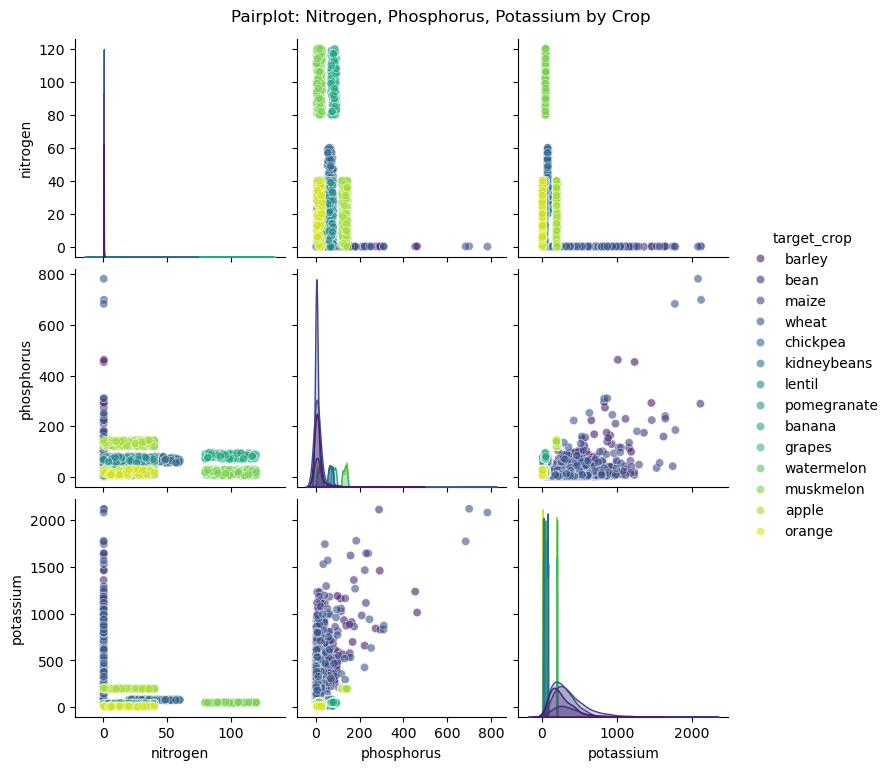

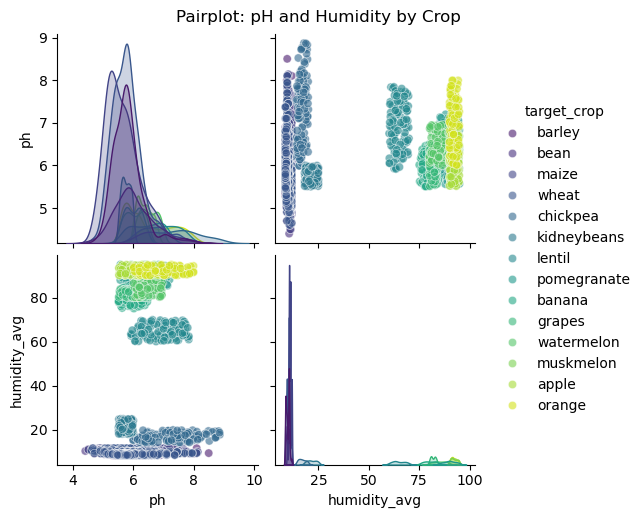

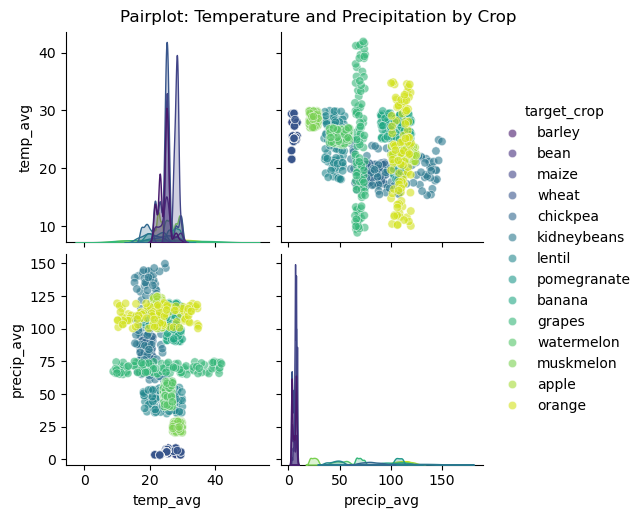

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define feature groups
group1 = ['nitrogen', 'phosphorus', 'potassium']
group2 = ['ph', 'humidity_avg']
group3 = ['temp_avg', 'precip_avg']

# Plot group 1
sns.pairplot(df[group1 + ['target_crop']], hue='target_crop', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Nitrogen, Phosphorus, Potassium by Crop', y=1.02)
plt.show()

# Plot group 2
sns.pairplot(df[group2 + ['target_crop']], hue='target_crop', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: pH and Humidity by Crop', y=1.02)
plt.show()

# Plot group 3
sns.pairplot(df[group3 + ['target_crop']], hue='target_crop', palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot: Temperature and Precipitation by Crop', y=1.02)
plt.show()


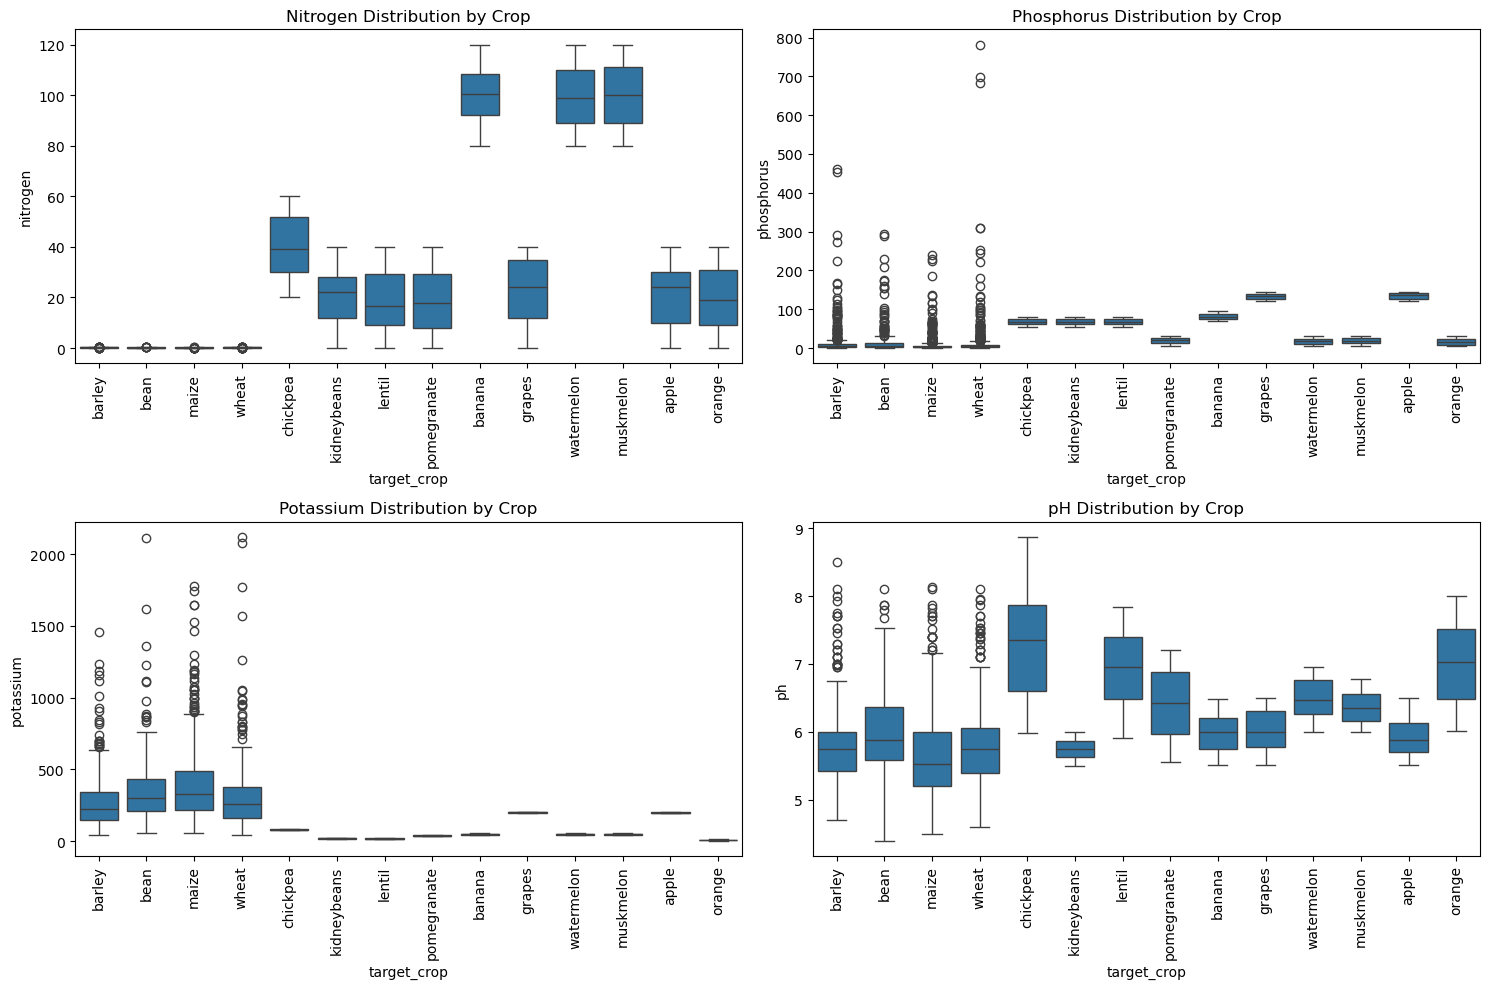

In [26]:
plt.figure(figsize=(15, 10))

# Create subplots for each nutrient
plt.subplot(2, 2, 1)
sns.boxplot(x='target_crop', y='nitrogen', data=df)
plt.xticks(rotation=90)
plt.title('Nitrogen Distribution by Crop')

plt.subplot(2, 2, 2)
sns.boxplot(x='target_crop', y='phosphorus', data=df)
plt.xticks(rotation=90)
plt.title('Phosphorus Distribution by Crop')

plt.subplot(2, 2, 3)
sns.boxplot(x='target_crop', y='potassium', data=df)
plt.xticks(rotation=90)
plt.title('Potassium Distribution by Crop')

plt.subplot(2, 2, 4)
sns.boxplot(x='target_crop', y='ph', data=df)
plt.xticks(rotation=90)
plt.title('pH Distribution by Crop')

plt.tight_layout()
plt.show()

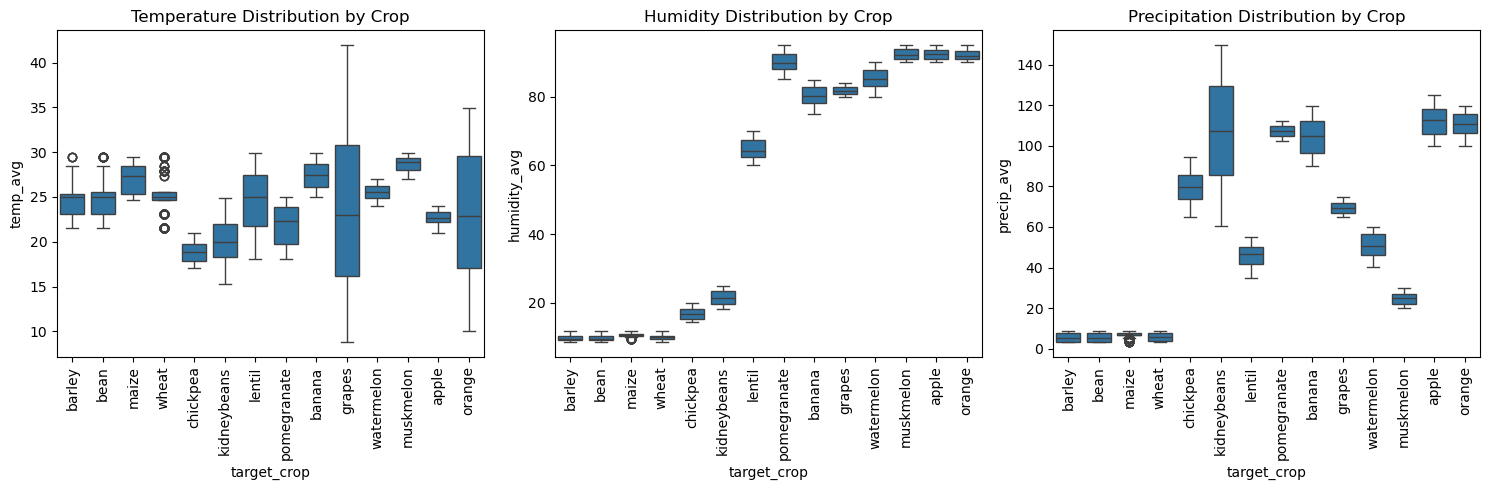

In [27]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='target_crop', y='temp_avg', data=df)
plt.xticks(rotation=90)
plt.title('Temperature Distribution by Crop')

plt.subplot(1, 3, 2)
sns.boxplot(x='target_crop', y='humidity_avg', data=df)
plt.xticks(rotation=90)
plt.title('Humidity Distribution by Crop')

plt.subplot(1, 3, 3)
sns.boxplot(x='target_crop', y='precip_avg', data=df)
plt.xticks(rotation=90)
plt.title('Precipitation Distribution by Crop')

plt.tight_layout()
plt.show()

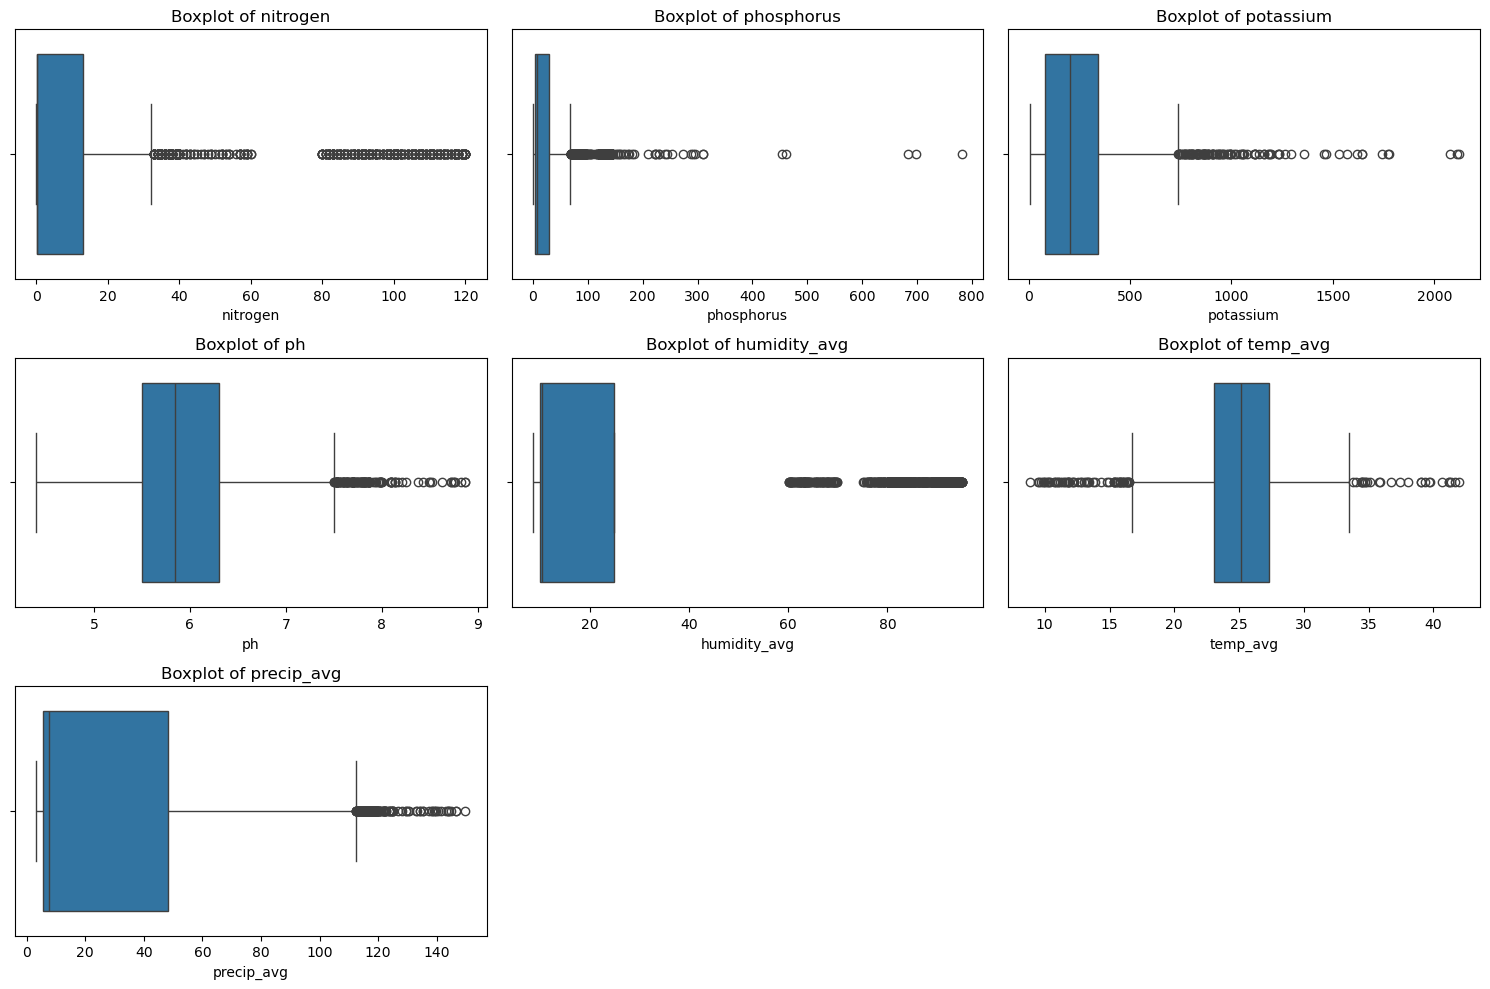

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['nitrogen', 'phosphorus', 'potassium', 'ph', 'humidity_avg', 'temp_avg', 'precip_avg']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [33]:
def outlier_counts(df, columns):
    outlier_info = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_info[col] = len(outliers)
    return outlier_info

num_features = ['nitrogen', 'phosphorus', 'potassium', 'ph', 
                'humidity_avg', 'temp_avg', 'precip_avg']

outliers_dict = outlier_counts(df, num_features)

# Format output as string
outlier_summary = ', '.join([f"{col}: {count}" for col, count in outliers_dict.items()])
print(outlier_summary)


nitrogen: 486, phosphorus: 520, potassium: 107, ph: 124, humidity_avg: 800, temp_avg: 89, precip_avg: 163


In [35]:
import numpy as np

for col in num_features:
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower, upper)


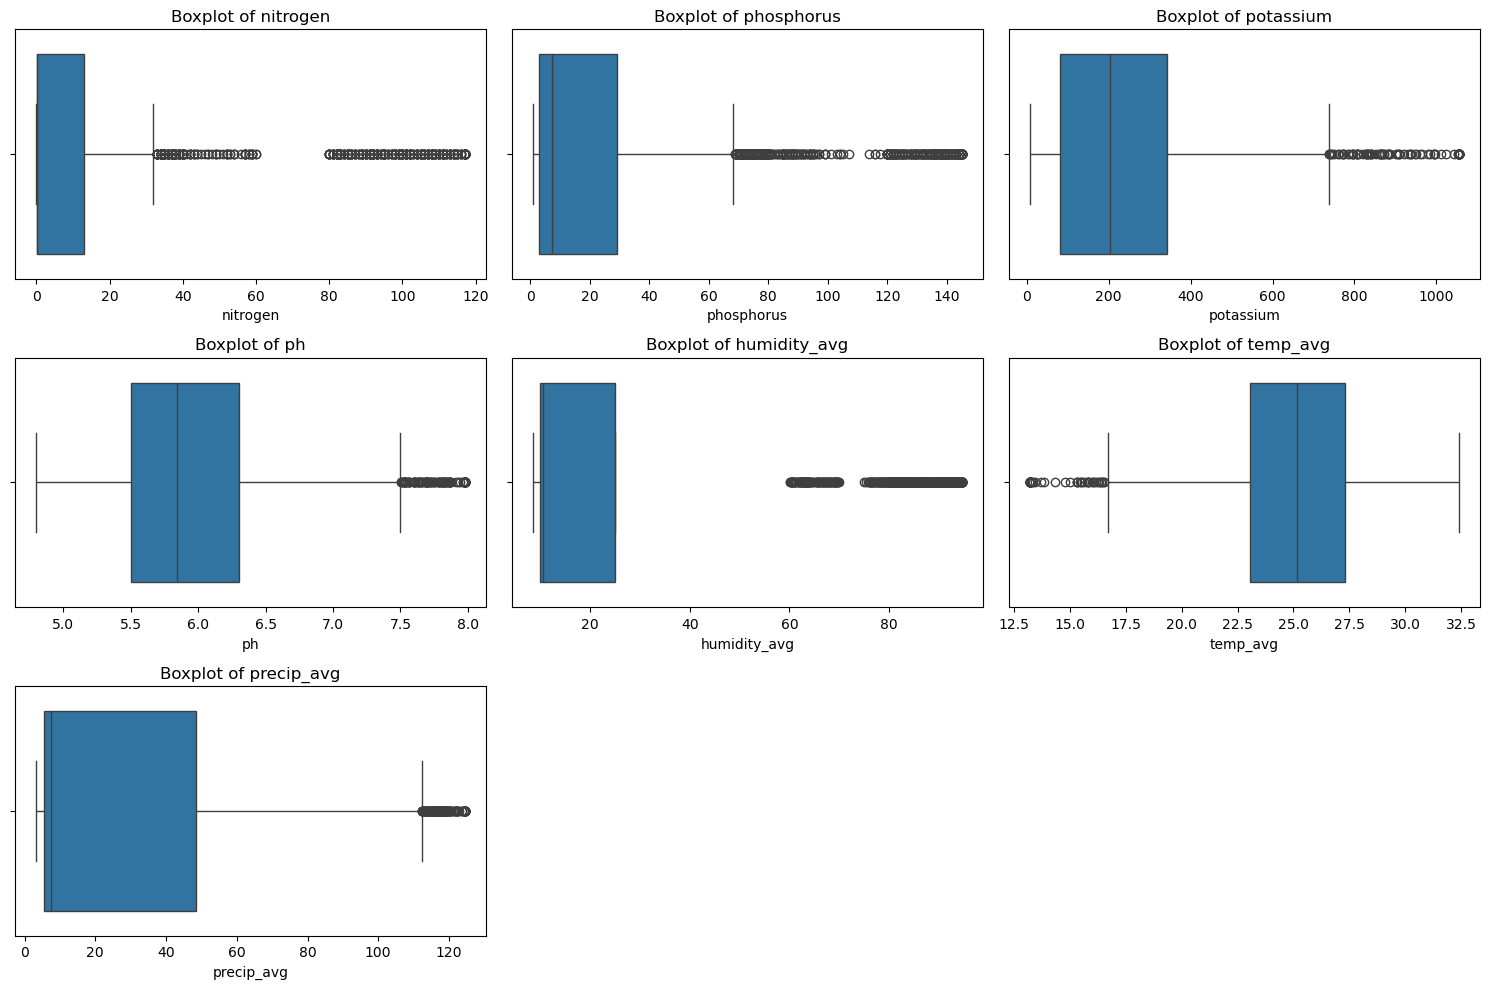

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = ['nitrogen', 'phosphorus', 'potassium', 'ph', 'humidity_avg', 'temp_avg', 'precip_avg']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [39]:
df.head()

,nitrogen,phosphorus,potassium,ph,humidity_avg,temp_avg,precip_avg,target_crop,region_city
0,0.23,5.401,738.231,5.81,10.024167,25.178333,6.229167,barley,Fès-Meknès
1,0.23,10.478,606.382,5.43,10.024167,25.178333,6.229167,barley,Gharb
2,0.23,6.847,386.580,5.41,10.024167,25.178333,6.229167,barley,Tadla
3,0.23,3.418,207.086,5.65,10.024167,25.178333,6.229167,barley,Fès-Meknès
4,0.23,39.282,317.357,5.27,10.024167,25.178333,6.229167,barley,Tadla


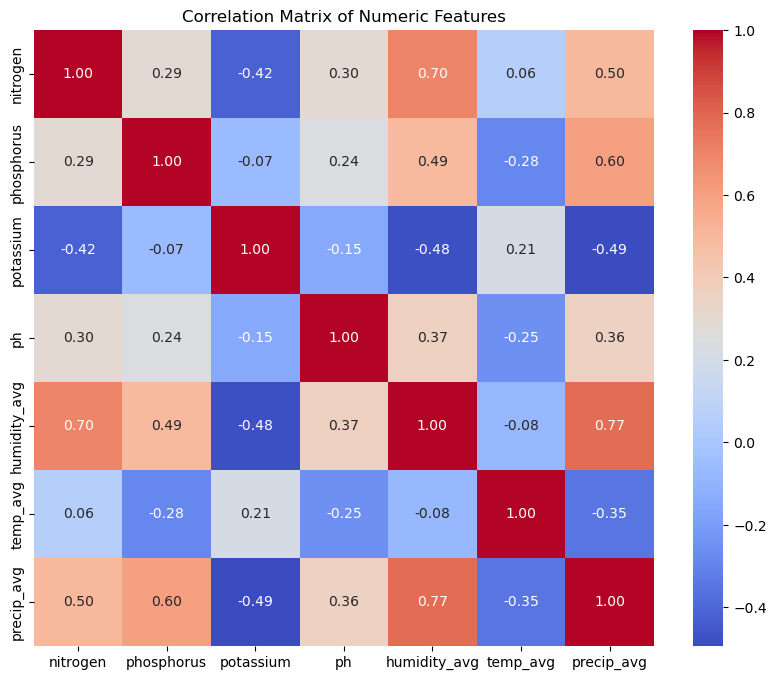

In [41]:
plt.figure(figsize=(10, 8))
corr_matrix = df[num_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()


target_crop
maize          732
wheat          715
barley         503
bean           253
chickpea       100
kidneybeans    100
lentil         100
pomegranate    100
banana         100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
Name: count, dtype: int64


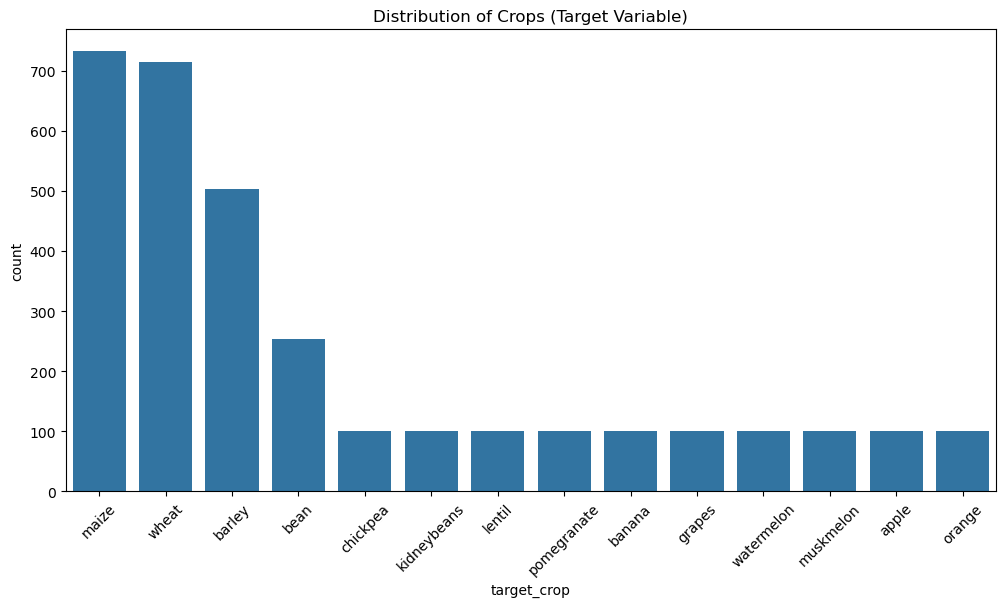

In [43]:
print(df['target_crop'].value_counts())

plt.figure(figsize=(12,6))
sns.countplot(x='target_crop', data=df, order=df['target_crop'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Crops (Target Variable)')
plt.show()


In [45]:
df = pd.get_dummies(df, columns=['region_city'], drop_first=True)


In [47]:
df.head()

,nitrogen,phosphorus,potassium,ph,humidity_avg,temp_avg,precip_avg,target_crop,region_city_Gharb,region_city_Marrakech-Safi,region_city_Middle Atlas,region_city_Souss-Massa,region_city_Tadla,region_city_Unknown
0,0.23,5.401,738.231,5.81,10.024167,25.178333,6.229167,barley,False,False,False,False,False,False
1,0.23,10.478,606.382,5.43,10.024167,25.178333,6.229167,barley,True,False,False,False,False,False
2,0.23,6.847,386.580,5.41,10.024167,25.178333,6.229167,barley,False,False,False,False,True,False
3,0.23,3.418,207.086,5.65,10.024167,25.178333,6.229167,barley,False,False,False,False,False,False
4,0.23,39.282,317.357,5.27,10.024167,25.178333,6.229167,barley,False,False,False,False,True,False


In [49]:
# Create nutrient ratio features
df['N_to_P'] = df['nitrogen'] / (df['phosphorus'] + 1e-6)  
df['K_to_P'] = df['potassium'] / (df['phosphorus'] + 1e-6)
df['N_to_K'] = df['nitrogen'] / (df['potassium'] + 1e-6)


In [51]:
# Create a new feature representing the ratio of average precipitation to average humidity
df['precip_to_humidity'] = df['precip_avg'] / (df['humidity_avg'] + 1e-6)

# Create an interaction feature between average temperature and soil pH
df['temp_ph_interaction'] = df['temp_avg'] * df['ph']

# Create a feature as the product of average humidity and average precipitation
df['humidity_precip_product'] = df['humidity_avg'] * df['precip_avg']


In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Encode the target
le = LabelEncoder()
df['target_encoded'] = le.fit_transform(df['target_crop'])

# 2. Prepare features and target
X = df.drop(columns=['target_crop', 'target_encoded'])
y = df['target_encoded']

# 3. Train-test split (with stratify to preserve class distribution)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))
print("Accuracy:", accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
      barley       0.51      0.41      0.45       101
        bean       0.80      0.55      0.65        51
    chickpea       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.86      0.95      0.90       146
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
 pomegranate       1.00      1.00      1.00        20
  watermelon       1.00      1.00      1.00        20
       wheat       0.63      0.72      0.67       143

    accuracy                           0.80       641
   macro avg       0.91      0.90      0.91       641
weighted avg       0.79      0.80      0.79       641

Accuracy: 0.7971918876755

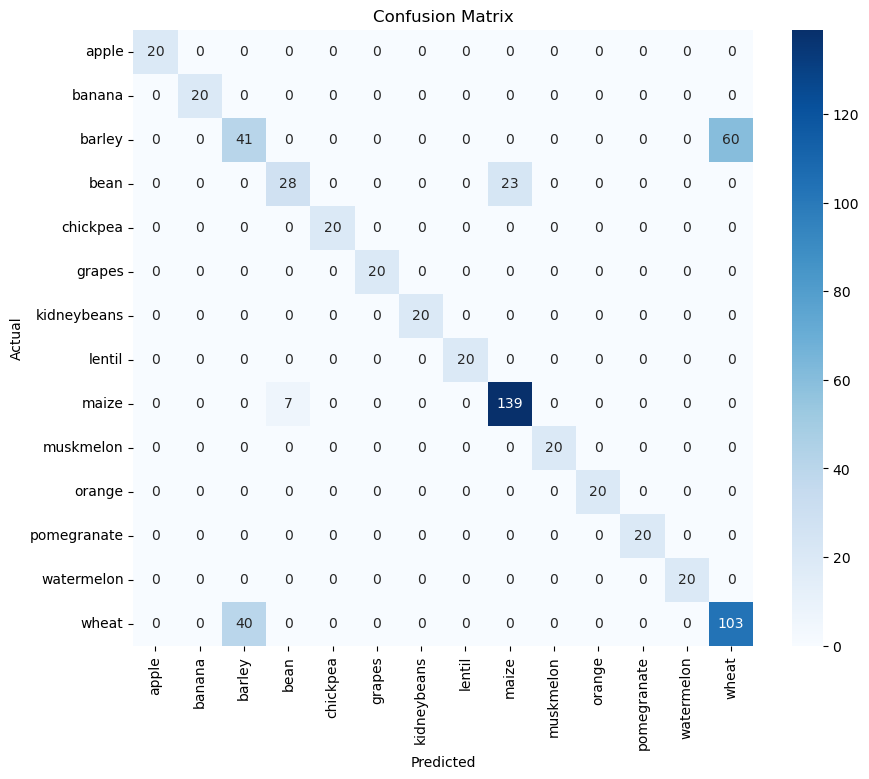

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [65]:
!pip install lightgbm catboost xgboost

In [67]:
# Define Features & Target
X = df.drop(columns=['target_crop', 'target_encoded'])
y = df['target_encoded']

# --------------------
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [85]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define Models
models = {
    'RandomForest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    'LightGBM': LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1),
    'CatBoost': CatBoostClassifier(verbose=0, random_state=42, auto_class_weights='Balanced'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=500, class_weight='balanced', random_state=42),
    'DecisionTree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(max_iter=300, random_state=42)
}

# --------------------
# Training Loop
for name, model in models.items():
    print(f"\n====== Training {name} ======")
    
    if name in ['KNN', 'SVM', 'LogisticRegression', 'MLPClassifier']:
        # Use scaled resampled data for scaled models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Use original resampled data for tree-based models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, target_names=le.classes_))


====== Training RandomForest ======
Accuracy: 0.7972
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
      barley       0.51      0.41      0.45       101
        bean       0.80      0.55      0.65        51
    chickpea       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.86      0.95      0.90       146
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
 pomegranate       1.00      1.00      1.00        20
  watermelon       1.00      1.00      1.00        20
       wheat       0.63      0.72      0.67       143

    accuracy                           0.80       641
   macro avg       0.91      0.90      0.91       641
weighted avg       0.79   

C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:50:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.7941
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
      barley       0.49      0.49      0.49       101
        bean       0.78      0.61      0.68        51
    chickpea       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.87      0.94      0.90       146
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00      1.00        20
 pomegranate       1.00      1.00      1.00        20
  watermelon       1.00      1.00      1.00        20
       wheat       0.64      0.64      0.64       143

    accuracy                           0.79       641
   macro avg       0.91      0.91      0.91       641
weighted avg       0.79      0.79      0.79       641


====== 

In [87]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

# 1. Gradient Boosting tuning
gb = GradientBoostingClassifier(random_state=42)

gb_param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.9, 1.0]
}

gb_search = RandomizedSearchCV(gb, gb_param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
gb_search.fit(X_train, y_train)
print("Best Gradient Boosting params:", gb_search.best_params_)
print("Best Gradient Boosting accuracy:", gb_search.best_score_)

# 2. LightGBM tuning
lgbm = lgb.LGBMClassifier(random_state=42)

lgb_param_dist = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 5, 10]
}

lgb_search = RandomizedSearchCV(lgbm, lgb_param_dist, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
lgb_search.fit(X_train, y_train)
print("Best LightGBM params:", lgb_search.best_params_)
print("Best LightGBM accuracy:", lgb_search.best_score_)


Best Gradient Boosting params: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
Best Gradient Boosting accuracy: 0.8208430913348946
Best LightGBM params: {'num_leaves': 50, 'n_estimators': 100, 'max_depth': -1, 'learning_rate': 0.01}
Best LightGBM accuracy: 0.817720530835285


In [89]:
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# best parameters from tuning
gb_params = {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
lgbm_params = {'num_leaves': 50, 'n_estimators': 100, 'max_depth': -1, 'learning_rate': 0.01}


# Gradient Boosting
gb_model = GradientBoostingClassifier(**gb_params)
gb_model.fit(X_train, y_train)

#  LightGBM
lgbm_model = lgb.LGBMClassifier(**lgbm_params)
lgbm_model.fit(X_train, y_train)

#  Predict on test set
gb_preds = gb_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)

#  Evaluate and print results

def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} Evaluation ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))
    print("\n")

evaluate_model("Gradient Boosting", y_test, gb_preds)
evaluate_model("LightGBM", y_test, lgbm_preds)

# 5. Pick the best model based on accuracy or F1 as you prefer
best_model_name = "Gradient Boosting" if accuracy_score(y_test, gb_preds) >= accuracy_score(y_test, lgbm_preds) else "LightGBM"
print(f"Best model on test set: {best_model_name}")


=== Gradient Boosting Evaluation ===
Accuracy: 0.8112
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.54      0.37      0.44       101
           3       0.84      0.61      0.70        51
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.88      0.96      0.92       146
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.64      0.78      0.70       143

    accuracy                           0.81       641
   macro avg       0.92      0.91      0.91       641
weighted avg       0.81   

In [99]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,  
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

random_search_rf.fit(X_train, y_train)

print("Best RF params:", random_search_rf.best_params_)
print("Best RF accuracy:", random_search_rf.best_score_)


Best RF params: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': True}
Best RF accuracy: 0.8227971186647174


In [93]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(random_state=42, max_iter=500)

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50), (50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

grid_search_mlp = GridSearchCV(estimator=mlp, param_grid=param_grid_mlp,
                               cv=5, n_jobs=-1, scoring='accuracy')

grid_search_mlp.fit(X_train, y_train)

print("Best MLP params:", grid_search_mlp.best_params_)
print("Best MLP accuracy:", grid_search_mlp.best_score_)


Best MLP params: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (50, 25), 'learning_rate': 'constant', 'solver': 'adam'}
Best MLP accuracy: 0.7556553057992202


In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Best parameters from tuning
rf_params = {
    'n_estimators': 400,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 40,
    'bootstrap': True
}

# Random Forest
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

# Predict on test set
rf_preds = rf_model.predict(X_test)

# Evaluate and print results
def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} Evaluation ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(classification_report(y_true, y_pred))
    print("\n")

evaluate_model("Random Forest", y_test, rf_preds)


=== Random Forest Evaluation ===
Accuracy: 0.8003
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.48      0.39      0.43       101
           3       0.91      0.59      0.71        51
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.87      0.98      0.92       146
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.62      0.71      0.66       143

    accuracy                           0.80       641
   macro avg       0.92      0.90      0.91       641
weighted avg       0.80      0

In [103]:
import joblib

# Save models
joblib.dump(rf_model, 'random_forest_model.joblib')
joblib.dump(gb_model, 'gradient_boosting_model.joblib')
joblib.dump(lgbm_model, 'lightgbm_model.joblib')

print(" Models saved successfully!")


 Models saved successfully!



=== Random Forest ===
Accuracy: 0.8003
Precision: 0.7970
Recall: 0.8003
F1-score: 0.7938
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.48      0.39      0.43       101
           3       0.91      0.59      0.71        51
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.87      0.98      0.92       146
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.62      0.71      0.66       143

    accuracy                           0.80       641
   macro avg       0.92      0.90      0.91 

<Figure size 1000x600 with 0 Axes>

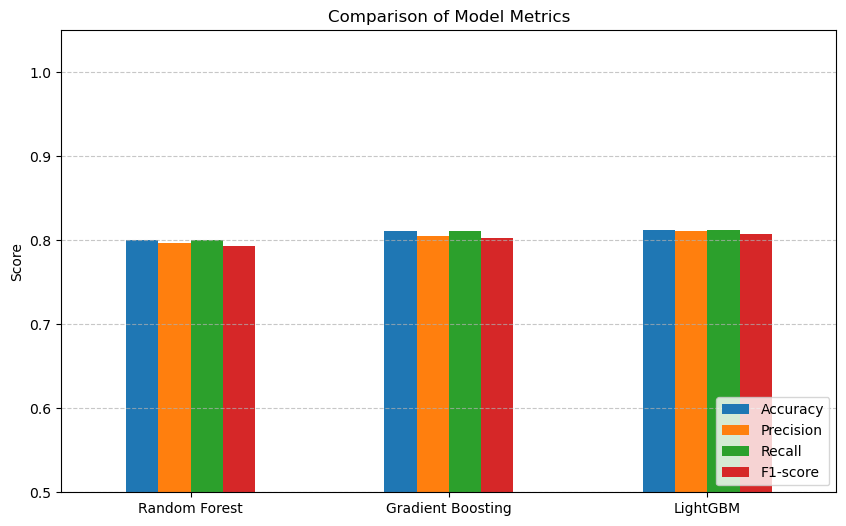

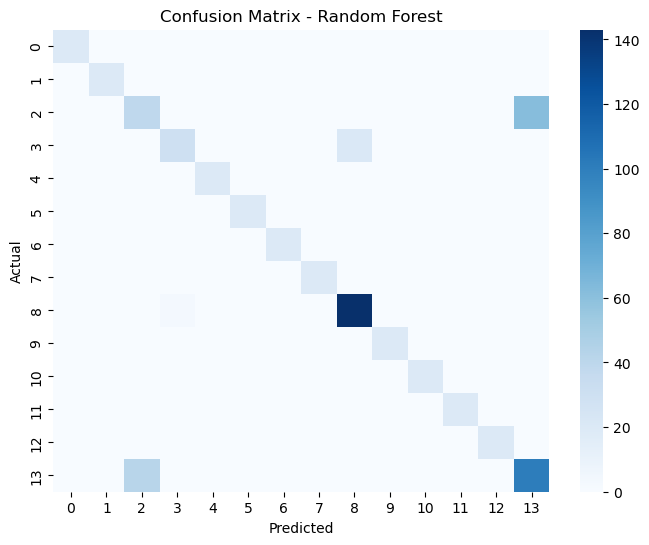

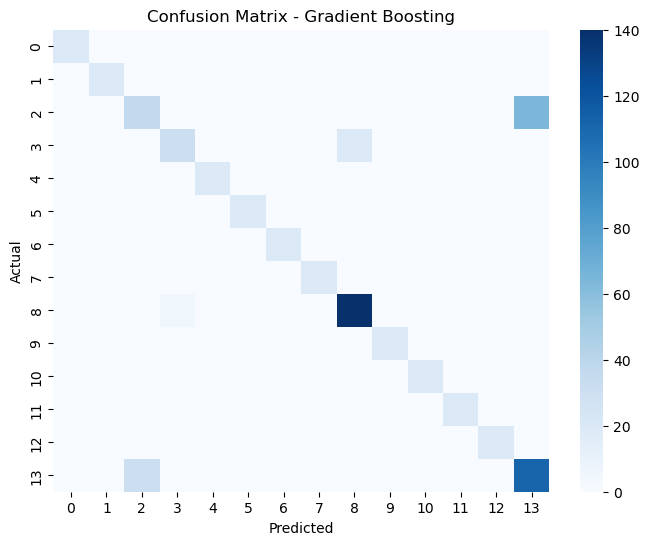

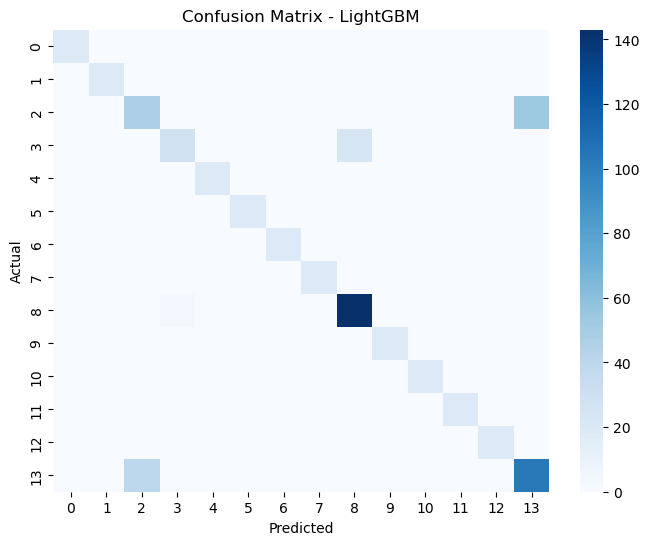

In [105]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# === Metrics Function ===
def get_metrics(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(classification_report(y_true, y_pred))
    
    return [acc, prec, rec, f1]


# === Get metrics for each model ===
rf_metrics = get_metrics('Random Forest', y_test, rf_preds)
gb_metrics = get_metrics('Gradient Boosting', y_test, gb_preds)
lgbm_metrics = get_metrics('LightGBM', y_test, lgbm_preds)


# === Create dataframe for comparison ===
results_df = pd.DataFrame(
    [rf_metrics, gb_metrics, lgbm_metrics],
    columns=['Accuracy', 'Precision', 'Recall', 'F1-score'],
    index=['Random Forest', 'Gradient Boosting', 'LightGBM']
)


# === Plot the metrics ===
plt.figure(figsize=(10,6))
results_df.plot(kind='bar', figsize=(10,6))
plt.title('Comparison of Model Metrics')
plt.ylabel('Score')
plt.ylim(0.5, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()


# === Confusion Matrix Function ===
def plot_conf_matrix(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


# === Plot confusion matrices ===
plot_conf_matrix('Random Forest', y_test, rf_preds)
plot_conf_matrix('Gradient Boosting', y_test, gb_preds)
plot_conf_matrix('LightGBM', y_test, lgbm_preds)


=== Random Forest Advanced Metrics ===
Log Loss: 0.3643
Balanced Accuracy: 0.9043
Matthews Corr Coef: 0.7670

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.48      0.39      0.43       101
           3       0.91      0.59      0.71        51
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.87      0.98      0.92       146
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.62      0.71      0.66       143

    accuracy                           0.80       641
 

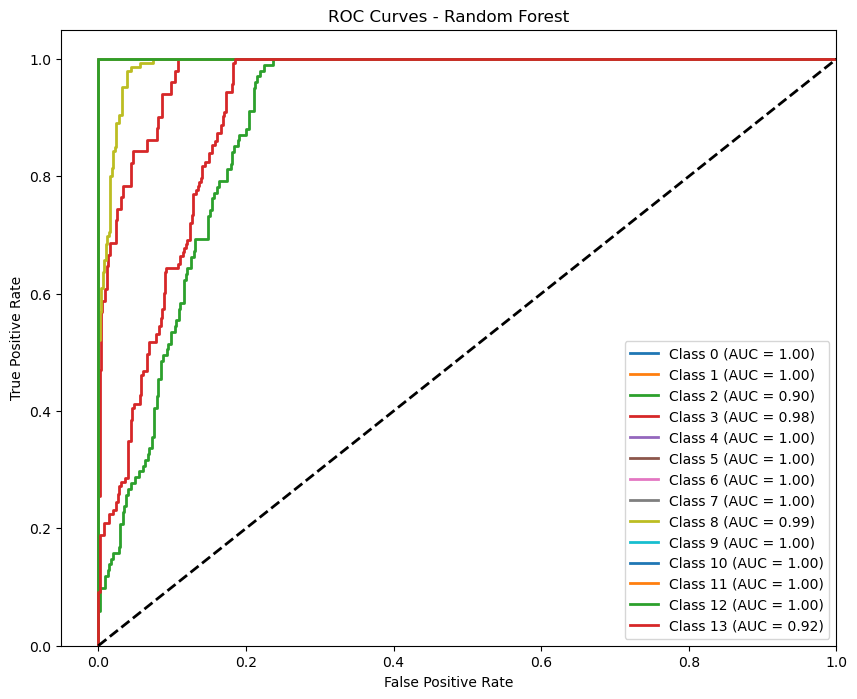

=== Gradient Boosting Advanced Metrics ===
Log Loss: 0.3513
Balanced Accuracy: 0.9083
Matthews Corr Coef: 0.7811

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.54      0.37      0.44       101
           3       0.84      0.61      0.70        51
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.88      0.96      0.92       146
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.64      0.78      0.70       143

    accuracy                           0.81       6

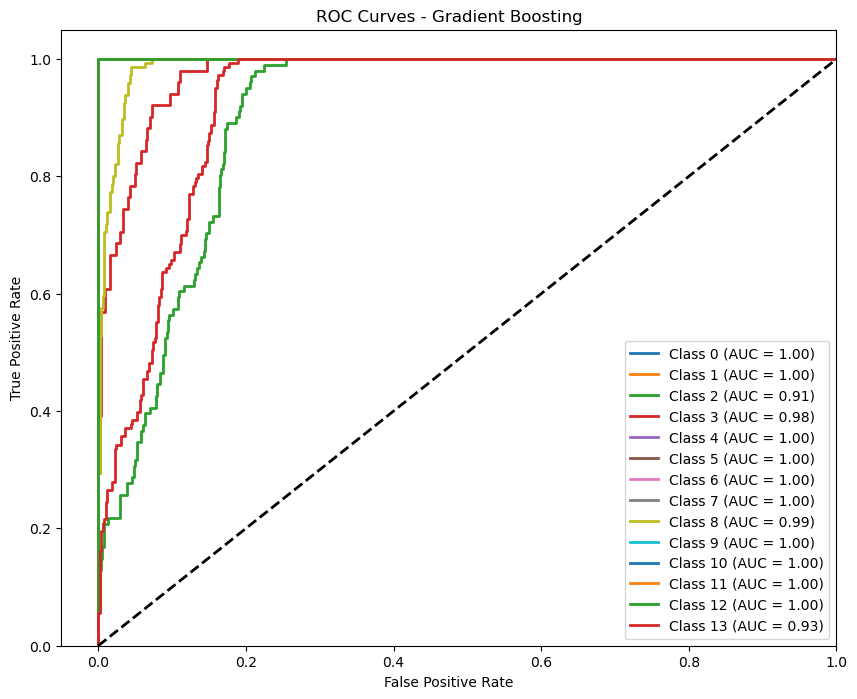

=== LightGBM Advanced Metrics ===
Log Loss: 0.5920
Balanced Accuracy: 0.9081
Matthews Corr Coef: 0.7815

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.54      0.47      0.50       101
           3       0.90      0.55      0.68        51
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.86      0.98      0.92       146
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       0.66      0.72      0.69       143

    accuracy                           0.81       641
   mac

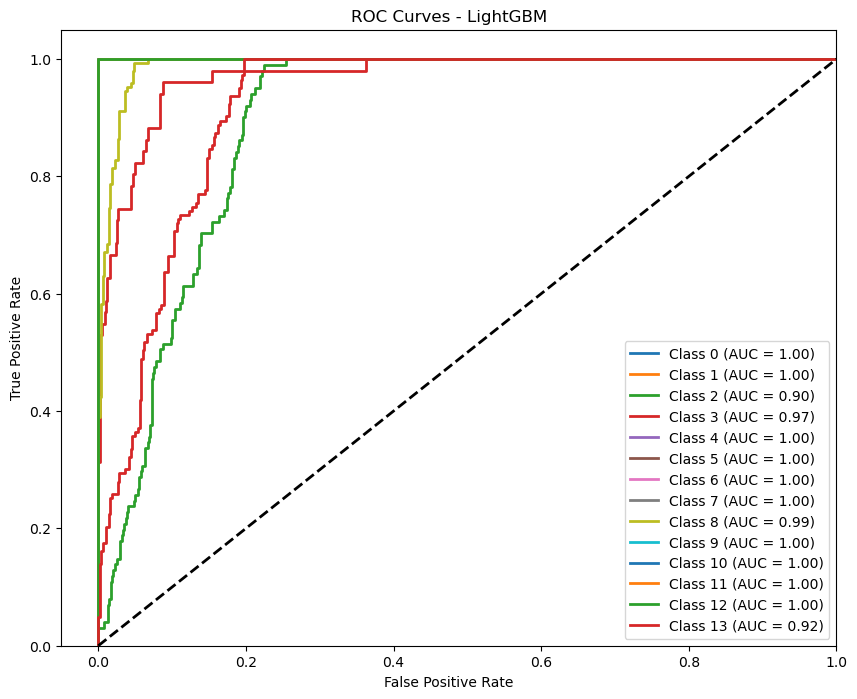

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc, log_loss,
    balanced_accuracy_score, matthews_corrcoef,
    classification_report
)
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC computation (one-vs-rest)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

def plot_roc_curves(model, X_test, y_test_bin, model_name):
    y_score = model.predict_proba(X_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    plt.figure(figsize=(10,8))
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], lw=2,
                 label=f'Class {classes[i]} (AUC = {roc_auc[i]:0.2f})')
    
    plt.plot([0,1], [0,1], 'k--', lw=2)
    plt.xlim([-0.05,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Calculate and print metrics
def evaluate_advanced_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)

    print(f"=== {model_name} Advanced Metrics ===")
    print(f"Log Loss: {log_loss(y_test, y_proba):.4f}")
    print(f"Balanced Accuracy: {balanced_accuracy_score(y_test, y_pred):.4f}")
    print(f"Matthews Corr Coef: {matthews_corrcoef(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")
    
    # Plot ROC curves
    plot_roc_curves(model, X_test, y_test_bin, model_name)

evaluate_advanced_metrics(rf_model, X_test, y_test, "Random Forest")
evaluate_advanced_metrics(gb_model, X_test, y_test, "Gradient Boosting")
evaluate_advanced_metrics(lgbm_model, X_test, y_test, "LightGBM")




In [1]:
df.head()

NameError: name 'df' is not defined